# 2.1 SOO for 2D scalar field

In [11]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

/home/dharrington/cyclops/src


We load the stored true fields that we read in chapter 1 of the manual. We also load the graph manager to display the results.

We get the boundaries of the field, and make sure that sensors can't be placed at the very edge but must be placed at least 2mm away.

In [12]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'temp_plane_field.obj')
grid = pickle_manager.read_file('simulation', 'temp_plane_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1, 1], [-1, -1]])*0.002

We use the symmetry manager to force any assumptions about planes of symmetry that we might make.

We then setup the sensor suite, and you can uncomment the code below to find out how to use a MultiSensor (that finds the value at many points - like a DIC or an IR camera).

In [13]:
# Setup the symmetry
symmetry_manager = SymmetryManager()
symmetry_manager.set_2D_x(np.mean(field_bounds[:, 0]))

# Setup the sensor suite
def f(x): return np.zeros(x.shape)
sensor = RoundSensor(0, f, 0, np.array([[-5000], [5000]]), 0, 2)
sensors = np.array([sensor]*5)

# def f(x): return np.zeros(x.shape)
# sensor = MultiSensor(0, f, 0.1, np.array([[-5000], [5000]]), np.linspace(sensor_bounds[0, 0], sensor_bounds[1, 0], 10).reshape(-1, 2))
# sensors = np.array([sensor])

sensor_suite = SensorSuite(
    ScalarField(RBFModel, field_bounds), 
    sensors,
    symmetry=[symmetry_manager.reflect_2D_horiz]
)

We define the optimiser. You can change up the parameters including the time it takes to optimise for, and the type of optimiser (GAOptimiser is the only other SOO optimiser).

In [14]:
# Setup the experiment
optimiser = PSOOptimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_soo(
    sensor_suite,
    sensor_bounds
)
res = experiment.design()
proposed_layout, true_temps, model_temps, sensor_values = experiment.get_SOO_plotting_arrays(res.X)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       30 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  3.629002E+04 |  2.579277E+03
     2 |       60 |  0.29853 |       2 |  0.5916 |  2.02624 |  1.97376 |  2.433388E+04 |  2.579277E+03
     3 |       90 |  0.09622 |       3 |  0.4613 |  2.02579 |  1.99145 |  1.487808E+04 |  2.579277E+03
     4 |      120 | -1.1E-02 |       3 |  0.3931 |  2.01685 |  2.00220 |  9.201170E+03 |  1.762167E+03
     5 |      150 |  0.03323 |       3 |  0.4209 |  2.00712 |  2.02110 |  5.256160E+03 |  1.112245E+03
     6 |      180 | -2.5E-02 |       3 |  0.3844 |  1.99320 |  2.03393 |  4.390876E+03 |  6.288666E+02
     7 |      210 | -1.9E-02 |       3 |  0.3882 |  1.98009 |  2.04245 |  3.372526E+03 |  4.503957E+02
     8 |      240 |  0.00018 |       3 |  0.4001 |  1.96942 |  2.05021 |  2.852669E+03 |  3.362965E+02
     9 |      270 | -9.1E-03 |       3 |  0.3943 |  1.96043 |  2.06007 | 

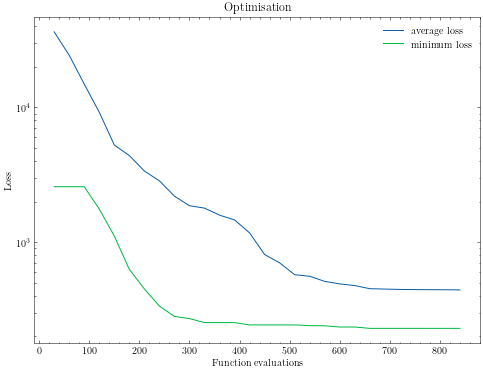

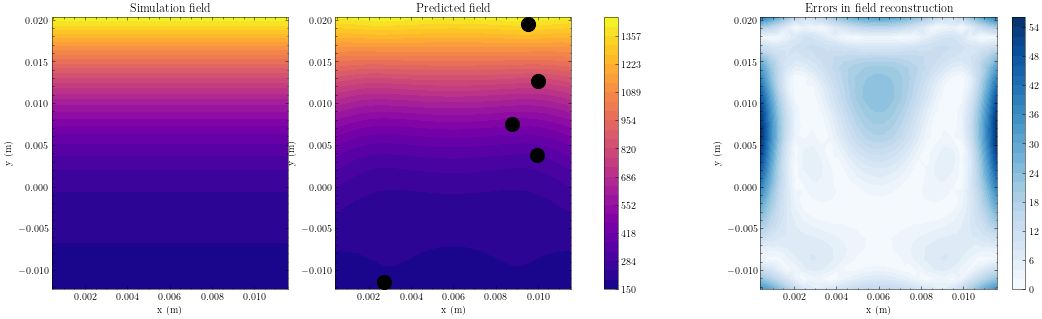

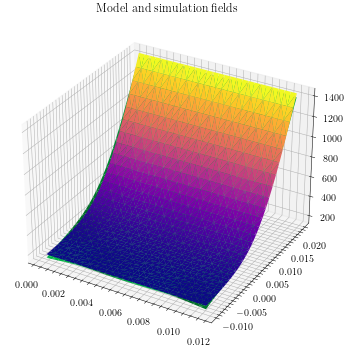

In [15]:
# Display the results
graph_manager.build_optimisation(
    res.history
)
graph_manager.draw()
graph_manager.build_2D_compare(
    grid,
    proposed_layout,
    true_temps,
    model_temps
)
graph_manager.draw()
graph_manager.build_3D_compare(
    grid,
    true_temps,
    model_temps
)
graph_manager.draw()